In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
#panda is a read/write tool

train_file = "c:\\digit_recog\\train.csv"
test_file = "c:\\digit_recog\\test.csv"

drData = pd.read_csv(train_file, header = 0)

In [171]:
drData.info()
#drData.describe()

drData.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


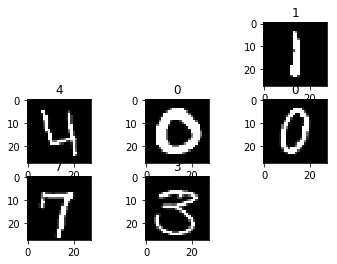

In [44]:
import matplotlib.pyplot as plt

images_sel = drData.iloc[0:50,1:]
labels_sel = drData.iloc[0:50,:1]

for i in range(2,8):
    plt.subplot(330 + (i+1))
    img = images_sel.iloc[i].as_matrix()
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(labels_sel.iloc[i,0])


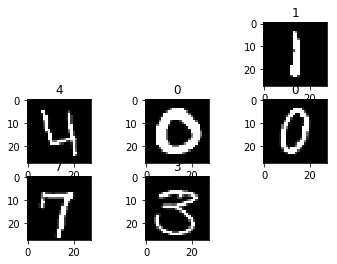

In [45]:
vData = drData.copy()
images_sel = vData.iloc[0:50,1:]
images_sel[images_sel > 140] = 255

for i in range(2,8):
    plt.subplot(330 + (i+1))
    img = images_sel.iloc[i].as_matrix()
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(labels_sel.iloc[i,0])


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

drData = pd.read_csv(train_file, header = 0)
images = drData.iloc[0:10000,1:]
labels = drData.iloc[0:10000,:1]
images[images > 140] = 255

X_train, X_test, y_train, y_test = train_test_split(images, labels)

In [38]:
def tryKnnBestNeighborParam(nbList):
    for idx, val in enumerate(nbList):
        knn = KNeighborsClassifier(n_neighbors=val, n_jobs=-1)

        knn.fit(X_train, y_train.values.ravel())
        X_test_predict = knn.predict(X_test)

        print(knn)
        print("Score of neighbor %s: %s\n" % (val, knn.score(X_test, y_test)))

In [39]:
nbList = [4,5,6,7,8]

tryKnnBestNeighborParam(nbList)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')
Score of neighbor 4: 0.9396

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of neighbor 5: 0.94

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
           weights='uniform')
Score of neighbor 6: 0.9384

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform')
Score of neighbor 7: 0.9368

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')
Score of neighbor 8: 0.9376



In [77]:
def tryBestFilterParam(fltList):
    for idx, val in enumerate(fltList):
        drData = pd.read_csv(train_file, header = 0)
        images = drData.iloc[0:10000,1:]
        labels = drData.iloc[0:10000,:1]
        images[images > val] = 255

        X_train, X_test, y_train, y_test = train_test_split(images, labels)

        knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

        knn.fit(X_train, y_train.values.ravel())
        X_test_predict = knn.predict(X_test)

        print(knn)
        print("Score of filter %s: %s\n" % (val, knn.score(X_test, y_test)))

In [78]:
fltList = [0,35,70,105,140,175,210,245]

tryBestFilterParam(fltList)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter 0: 0.94

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter 35: 0.9428

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter 70: 0.9436

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter 105: 0.9412

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter 140: 0.9428

KNeighborsClassifier(algorithm='auto

In [79]:
def tryBestAlgorithmParam(algList):
    drData = pd.read_csv(train_file, header = 0)
    images = drData.iloc[0:10000,1:]
    labels = drData.iloc[0:10000,:1]
    images[images > 210] = 255    
    X_train, X_test, y_train, y_test = train_test_split(images, labels)
    
    for idx, val in enumerate(algList):
        knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, algorithm=val)

        knn.fit(X_train, y_train.values.ravel())
        X_test_predict = knn.predict(X_test)

        print(knn)
        print("Score of algorithm %s: %s\n" % (val, knn.score(X_test, y_test)))

In [80]:
# makes no difference
algList = ['auto','ball_tree','kd_tree','brute']

tryBestAlgorithmParam(algList)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter auto: 0.944

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter ball_tree: 0.944

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter kd_tree: 0.944

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter brute: 0.944



In [81]:
def tryBestPvalue(pList):
    drData = pd.read_csv(train_file, header = 0)
    images = drData.iloc[0:10000,1:]
    labels = drData.iloc[0:10000,:1]
    images[images > 210] = 255    
    X_train, X_test, y_train, y_test = train_test_split(images, labels)
    
    for idx, val in enumerate(pList):
        knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, p=val)

        knn.fit(X_train, y_train.values.ravel())
        X_test_predict = knn.predict(X_test)

        print(knn)
        print("Score of P %s: %s\n" % (val, knn.score(X_test, y_test)))

In [82]:
# p=2 is better
pList = [1,2]

tryBestPvalue(pList)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=1,
           weights='uniform')
Score of P 1: 0.9364

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of P 2: 0.9484



In [83]:
def tryBestLeafParam(lfList):
    drData = pd.read_csv(train_file, header = 0)
    images = drData.iloc[0:10000,1:]
    labels = drData.iloc[0:10000,:1]
    images[images > 210] = 255    
    X_train, X_test, y_train, y_test = train_test_split(images, labels)
    
    for idx, val in enumerate(lfList):
        knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, leaf_size=val)

        knn.fit(X_train, y_train.values.ravel())
        X_test_predict = knn.predict(X_test)

        print(knn)
        print("Score of Leaf Size %s: %s\n" % (val, knn.score(X_test, y_test)))

In [84]:
lfList = [10,20,30,40,50]

tryBestLeafParam(lfList)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of algorithm 10: 0.9384

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of algorithm 20: 0.9384

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of algorithm 30: 0.9384

KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of algorithm 40: 0.9384

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of algorithm 50: 0.9384



In [87]:
def tryBestWeightsParam(wtList):
    drData = pd.read_csv(train_file, header = 0)
    images = drData.iloc[0:10000,1:]
    labels = drData.iloc[0:10000,:1]
    images[images > 210] = 255    
    X_train, X_test, y_train, y_test = train_test_split(images, labels)
    
    for idx, val in enumerate(wtList):
        knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights=val)

        knn.fit(X_train, y_train.values.ravel())
        X_test_predict = knn.predict(X_test)

        print(knn)
        print("Score of Weight %s: %s\n" % (val, knn.score(X_test, y_test)))

In [88]:
# distance is better
lfList = ['uniform','distance']

tryBestWeightsParam(lfList)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of Weight uniform: 0.942

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance')
Score of Weight distance: 0.9456



In [89]:
def tryScaleAffection(scaleList):
    for idx, val in enumerate(scaleList):
        drData = pd.read_csv(train_file, header = 0)
        images = drData.iloc[0:val,1:]
        labels = drData.iloc[0:val,:1]
        images[images > 210] = 255

        X_train, X_test, y_train, y_test = train_test_split(images, labels)

        knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights='distance')

        knn.fit(X_train, y_train.values.ravel())
        X_test_predict = knn.predict(X_test)

        print(knn)
        print("Score of scale %d: %s\n" % (val, knn.score(X_test, y_test)))

In [47]:
scaleList = [20000,30000,41999]

tryScaleAffection(scaleList)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter 20000: 0.9508

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter 30000: 0.959333333333

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Score of filter 41999: 0.966095238095



In [ ]:
drData = pd.read_csv(train_file, header = 0)
images = drData.iloc[0:41999,1:]
labels = drData.iloc[0:41999,:1]
images[images > 210] = 255

X_train, X_test, y_train, y_test = train_test_split(images, labels)

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights='distance')

knn.fit(X_train, y_train.values.ravel())
X_test_predict = knn.predict(X_test)

print(knn)
print("Score: %s\n" % (knn.score(X_test, y_test)))
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance')


In [50]:
drTest = pd.read_csv(test_file, header = 0)

In [51]:
drTest.info()
drTest.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
drTest_predict = knn.predict(drTest)

# compare with the almost data
almost_perfect_file = "c:\\digit_recog\\almost_perfect.csv"
almostPref = pd.read_csv(almost_perfect_file, header = 0)
alpSurv = almostPref['Label']

idx = 0
okay = 0
for ti_pred in drTest_predict:
    if ti_pred == alpSurv.iloc[idx]:
        okay += 1
    idx += 1

print okay
print idx

26814
28000


In [69]:
submission = pd.DataFrame(
    {
        'ImageId': list(range(1,len(drTest_predict)+1)), 
        'Label': drTest_predict
    })

submission.to_csv('c:\\digit_recog\\submission_knn.csv', index=False, header=True)